# Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Loading the dataset

In [23]:
url = "https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered.csv"
data = pd.read_csv(url)
data.head()

,date value
0,2013-04-28 135.98
1,2013-04-29 147.49
2,2013-04-30 146.93
3,2013-05-01 139.89
4,2013-05-02 125.6


# Pre-processing
The date and value are given in the same column. Hence the data needs to be refactored into two columns.

In [25]:
data = pd.read_csv(url)
data['date']  = pd.to_datetime(data['date value'].apply(lambda x: x.split()[0]))
data['value'] = pd.to_numeric(data['date value'].apply(lambda x: x.split()[1]))

print(f'dataset shape:', data.shape)
data.drop(columns='date value', axis=1, inplace=True)
for col in data.columns:
    print(col, f'dtype: {data[col].dtype}')
data.head()


dataset shape: (1822, 3)
date dtype: datetime64[ns]
value dtype: float64


,date,value
0,2013-04-28,135.98
1,2013-04-29,147.49
2,2013-04-30,146.93
3,2013-05-01,139.89
4,2013-05-02,125.60


# Preliminary Visualization
It is often a good idea to have a look at the numerical data before visualizing it. This can be done with histograms very well.

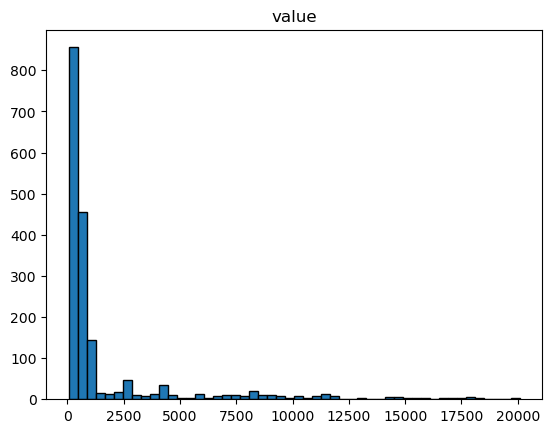

In [27]:
col = 'value'
plt.hist(data[col], bins=50, edgecolor='black')
plt.title(col)
plt.show()

# Lineplot / Area Chart
Lineplots are great at analyzing and showing trends and visualizing time series data because it is ordered by date. \
Another variant of Lineplots are called Area Plots which are lineplots with the area under them highlighted. This allows for a subtle difference in the visualization capability.

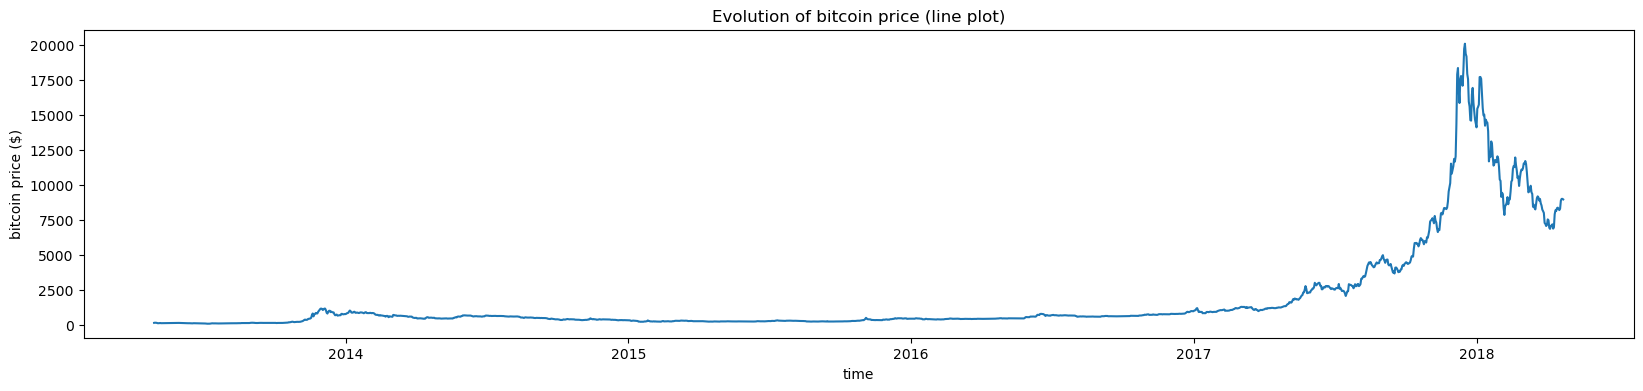

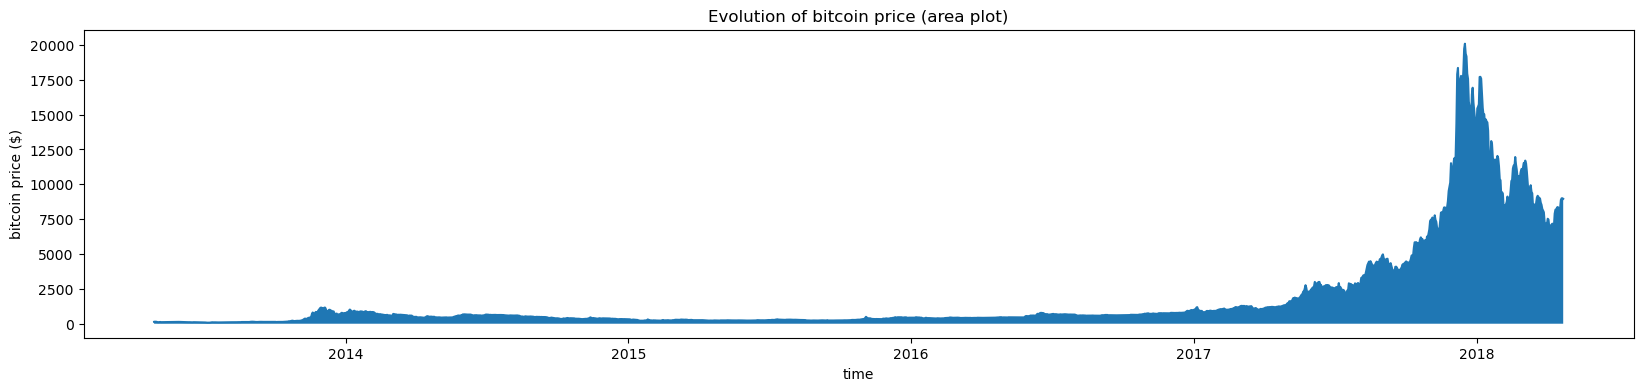

In [42]:
fig = plt.figure(figsize=[20, 4])
plt.plot(data['date'], data['value'])
plt.title('Evolution of bitcoin price (line plot)')
plt.xlabel('time')
plt.ylabel('bitcoin price ($)')
plt.show()

fig = plt.figure(figsize=[20, 4])
plt.plot(data['date'], data['value'])
plt.fill_between(data['date'], data['value'], 0)
plt.title('Evolution of bitcoin price (area plot)')
plt.xlabel('time')
plt.ylabel('bitcoin price ($)')
plt.show()

# Connected Scatterplots
In case of only a few data points, it is good to use connected scatterplots.

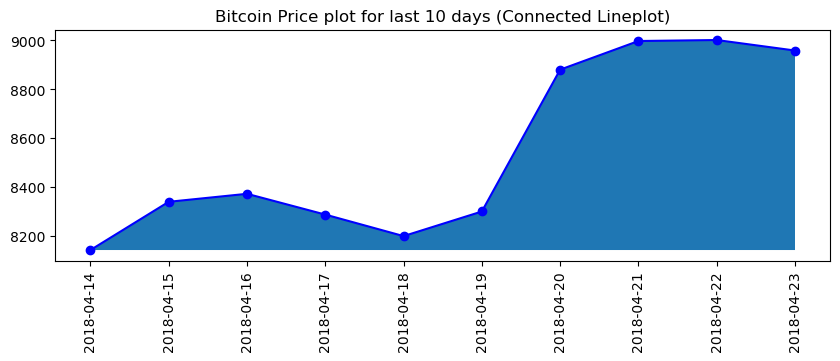

In [52]:
fig = plt.figure(figsize=[10, 3])
plt.plot(data['date'][-10:], data['value'][-10:], 'bo-')
plt.fill_between(data['date'][-10:], data['value'][-10:], min(data['value'][-10:]))
plt.title('Bitcoin Price plot for last 10 days (Connected Lineplot)')
plt.xticks(rotation=90)
plt.show()